# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Selected Project/Social_Network_Ads.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X.shape)

(400, 3)


Label Encoding the "Gender" column

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [6]:
print(X)

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


In [7]:
print(type(X))

<class 'numpy.ndarray'>


### Splitting the dataset into the Training set and Test set and valid set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [10]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

### Adding the second hidden layer

In [12]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the output layer

In [13]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [14]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [15]:
history = ann.fit(X_train, y_train, validation_split=0.20 ,batch_size = 64, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 74ms/step - loss: 0.6797 - accuracy: 0.5703 - val_loss: 0.6672 - val_accuracy: 0.7969
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6662 - accuracy: 0.7344 - val_loss: 0.6496 - val_accuracy: 0.8281
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6536 - accuracy: 0.7109 - val_loss: 0.6332 - val_accuracy: 0.8125
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6425 - accuracy: 0.6992 - val_loss: 0.6179 - val_accuracy: 0.7969
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6319 - accuracy: 0.7031 - val_loss: 0.6032 - val_accuracy: 0.7969
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6214 - accuracy: 0.6953 - val_loss: 0.5894 - val_accuracy: 0.7969
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6112 - accuracy: 0.6953 - val_loss: 0.5759 - val_accuracy: 0.7969
Epoch 8/100
4/4 [===

### Predicting the Test set results

In [16]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55  3]
 [ 1 21]]


0.95

In [18]:
test_loss, test_acc = ann.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

3/3 - 0s - loss: 0.1923 - accuracy: 0.9500 - 136ms/epoch - 45ms/step

Test accuracy: 0.949999988079071


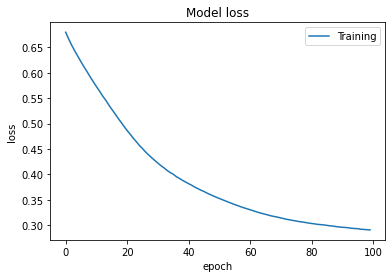

In [19]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training'], loc='upper right')
plt.show()

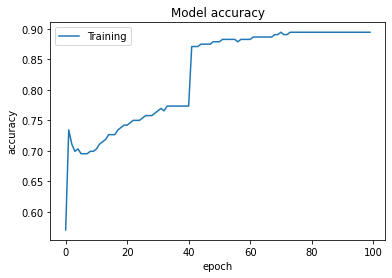

In [20]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training'], loc='upper left')
plt.show()

<function matplotlib.pyplot.show>

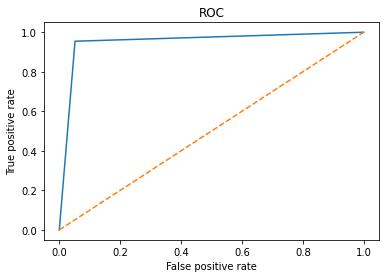

In [21]:
from sklearn.metrics import roc_curve
fpr,tpr ,thresholds =roc_curve(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title('ROC')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,tpr,linestyle='-')
plt.plot([0,1],[0,1],linestyle='--')
plt.show